*Import Libraries*

In [28]:
curr_dir = pathlib.Path.cwd()
data_dir = curr_dir.parent / 'Datasets' / 'brexit_edges.txt'
data_dir
G = nx.read_edgelist(data_dir , create_using=nx.DiGraph, nodetype=int)
excluded_edges = []

link_adj = nx.to_numpy_array(G)
edge_list = np.array(list(map(lambda x: list(x), list(G.edges()))))

Brexit

In [ ]:
#Import file
import pandas as pd
import utils
input_file = '/Users/agos/Documents/Echo-Chambers/MyProject/Datasets/brexit_stances.tsv'
df = pd.read_csv(input_file, sep='\t', header=0, usecols=['user', 'tweets', 'stance'])
from utils import preprocess
df1 = preprocess(df, 'tweets', 'stance', "|")
input_file = '/Users/agos/Documents/Echo-Chambers/MyProject/Datasets/brexit_edges.csv'
df_edge = pd.read_csv(input_file, sep= ',', header=None, usecols= [0,1])
from utils import sentiment_roberta 
df1 = sentiment_roberta(df1, df_edge)
from utils import build_graph
graph, link_adj, edg_adj = build_graph(df1)

In [ ]:
input_file = '/Users/agos/Documents/Echo-Chambers/MyProject/Datasets/brexit_stances.tsv'
df = pd.read_csv(input_file, sep='\t', header=0, usecols=['user', 'tweets', 'stance'])
df1 = utils.preprocess(df, 'tweets', 'stance')

In [ ]:
input_file = '/Users/agos/Documents/Echo-Chambers/MyProject/Datasets/brexit_edges.csv'
df_edge = pd.read_csv(input_file, sep= ',', header=None, usecols= [0,1])
import random
import networkx as nx
mean, std_dev = 0, 1  # Mean and standard deviation
df_edge['weight'] = [random.gauss(mean, std_dev) for _ in range(len(df_edge))]
#graph = nx.from_pandas_edgelist(df_edge, 0, 1, ["weight"])

for node in graph.nodes():
    if node in df1['user'].values:
        graph.nodes[node]['stance'] = df1[df1['user'] == node]['labels'].iloc[0]
    else:
        graph.nodes[node]['stance'] = 0
        
filtered_edges = {key: value for key, value in nx.get_edge_attributes(graph, 'weight').items() if value != 1}
filtered_nodes = {key: value for key, value in nx.get_node_attributes(graph, 'stance').items() if value != 0}
print(filtered_edges,filtered_nodes)

Vaccination

In [ ]:
import pandas as pd
import utils
input_file = '/Users/agos/Documents/Echo-Chambers/MyProject/Datasets/vaccination2.csv'
df = pd.read_csv(input_file, sep=',', header=0, usecols=['user_id', 'tweet', 'reply_to'])
df1 = utils.preprocess_vaccination(df)
graph, link_adj, edg_adj = utils.build_graph(df1)

New dataframe with shape:(105962, 4)


/Users/agos/miniconda3/envs/echochambers/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agos/miniconda3/envs/echochambers/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agos/miniconda3/envs/echochambers/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Count', ylabel='weight'>

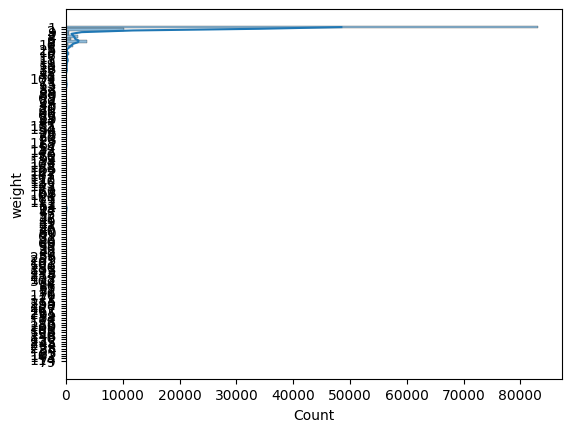

In [201]:
import numpy as np
import seaborn as sns
input_file = '/Users/agos/Documents/Echo-Chambers/MyProject/Datasets/vaccination2.csv'
df = pd.read_csv(input_file, sep=',', header=0, usecols=['user_id', 'tweet', 'reply_to'])
import json
#Extract edges between nodes
origine = []
dest = []
tweet = []
for item in range(len(df['reply_to'])):
    data_str = df['reply_to'].iloc[item]
    data_str = data_str.replace("'", '"')
    data_list = json.loads(data_str)
    user_ids = [entry['user_id'] for entry in data_list]
    i=0
    for elem in range(len(user_ids)-1):
        origine.append(user_ids[i])
        dest.append(user_ids[elem+1])
#Creat elist of weighted edges
source  = []
target = []
weight = []
tweet = []
column_tuples = [(val1, val2) for val1, val2 in zip(origine, dest)]

from collections import Counter
tuple_counter = Counter(column_tuples)
for tuple_value, count in tuple_counter.items():
    source.append(int(tuple_value[0]))
    target.append(int(tuple_value[1]))
    weight.append(count)
    tweet.append(df[df['user_id'] == (int(tuple_value[0]))]['tweet'].iloc[0])
df1 = pd.DataFrame(data = np.column_stack([source,target,weight,tweet]), columns= ['source','target','weight','tweet'])

#Assign new nodes numbers
# Extract unique nodes from both columns
unique_nodes = pd.concat([df1['source'], df1['target']]).unique()
# Create a mapping from old node IDs to new node IDs
node_mapping = {old_node: new_node for new_node, old_node in enumerate(unique_nodes)}
# Apply the mapping to the 'Source' and 'Target' columns
df1['source'] = df1['source'].map(node_mapping)
df1['target'] = df1['target'].map(node_mapping)
print(f'New dataframe with shape:{df1.shape}')

In [ ]:
from utils import louvain 
louvain(graph, df1, 0.5)

In [3]:
import utils
from gensim.models import Word2Vec
model = Word2Vec.load("/Users/agos/Documents/Echo-Chambers/MyProject/Datasets/embeddings_weight.model")
node_embeddings = model.wv
feature_vectors = utils.feature_vector(node_embeddings)

/Users/agos/miniconda3/envs/echochambers/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agos/miniconda3/envs/echochambers/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agos/miniconda3/envs/echochambers/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agos/miniconda3/envs/echochambers/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

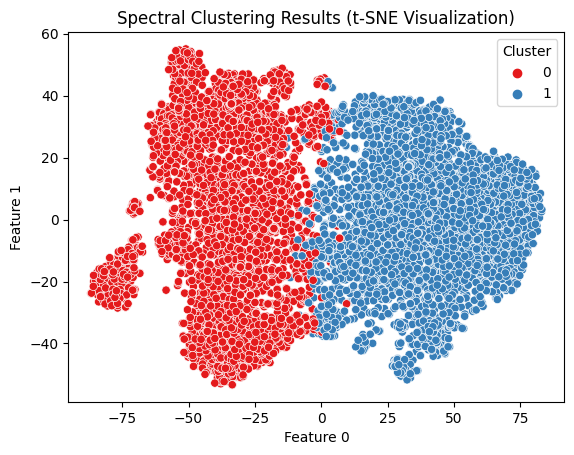

Some measures...
Silhouette Score: 0.4103580117225647
Calinski-Harabasz Index: 7636.988138601297
Davies-Bouldin Index: 0.9859831614330171
Hierarchical clustering...


In [7]:
utils.clustering(feature_vectors, 2, 'spectralclustering')